In [77]:
import torch
import open3d as o3d
import os
import json

def load_data(base_path):
    data = {'train': [], 'dev': []}

    for class_name in os.listdir(os.path.join(base_path, 'abo-part-labels')):
        for dataset_type in ['train', 'dev']:
            data_path = os.path.join(base_path, f'abo-part-labels/{class_name}/{dataset_type}')
            if not os.path.isdir(data_path):
                continue

            for id1 in os.listdir(data_path):
                meshes_struct = {'cc': {}, 'convex': {}}

                for mesh_type in ['cc', 'convex']:

                    cc_path = os.path.join(data_path, id1, mesh_type)
                    if os.path.isdir(cc_path):
                        for file in os.listdir(cc_path):
                            if file.endswith('.obj'):
                                file_path = os.path.join(cc_path, file)
                                # mesh = trimesh.load(file_path)
                                mesh = o3d.io.read_triangle_model(file_path)
                                id3 = file.split('.')[0]
                                meshes_struct[mesh_type][int(id3)] = mesh

                data[dataset_type].append((meshes_struct, class_name, id1))

    return data['train'], data['dev']

raw_mashes_data_train, raw_mashes_data_valid = load_data('datasets')

In [63]:
print(raw_mashes_data_train[0][0])

{'cc': {2: <trimesh.Trimesh(vertices.shape=(3081, 3), faces.shape=(6035, 3), name=`2.obj`)>, 1: <trimesh.Trimesh(vertices.shape=(1250, 3), faces.shape=(2496, 3), name=`1.obj`)>, 0: <trimesh.Trimesh(vertices.shape=(961, 3), faces.shape=(1795, 3), name=`0.obj`)>, 3: <trimesh.Trimesh(vertices.shape=(2670, 3), faces.shape=(5336, 3), name=`3.obj`)>, 6: <trimesh.Trimesh(vertices.shape=(170, 3), faces.shape=(336, 3), name=`6.obj`)>, 4: <trimesh.Trimesh(vertices.shape=(170, 3), faces.shape=(336, 3), name=`4.obj`)>, 5: <trimesh.Trimesh(vertices.shape=(170, 3), faces.shape=(336, 3), name=`5.obj`)>, 7: <trimesh.Trimesh(vertices.shape=(170, 3), faces.shape=(336, 3), name=`7.obj`)>}, 'convex': {2: <trimesh.Trimesh(vertices.shape=(94, 3), faces.shape=(184, 3), name=`2.obj`)>, 10: <trimesh.Trimesh(vertices.shape=(170, 3), faces.shape=(336, 3), name=`10.obj`)>, 12: <trimesh.Trimesh(vertices.shape=(170, 3), faces.shape=(336, 3), name=`12.obj`)>, 8: <trimesh.Trimesh(vertices.shape=(779, 3), faces.shape=

In [69]:
import numpy as np
import visualization


def connect_mesh(mesh_struct, base_path, dataset_type):
    relation_path = f'{base_path}/abo-part-labels/{mesh_struct[1]}/{dataset_type}/{mesh_struct[2]}/relation.json'
    combined_mesh = None

    if os.path.exists(relation_path):
        with open(relation_path, 'r') as file:
            relations = json.load(file)

        cc_to_convex = relations['cc_to_convex']

        for cc_index, convex_indices in enumerate(cc_to_convex):
            cc_mesh = mesh_struct[0]['cc'].get(cc_index)
            for convex_index in convex_indices:
                convex_mesh = mesh_struct[0]['convex'].get(convex_index)
                if cc_mesh and convex_mesh:
                    # Combine cc_mesh and convex_mesh
                    if combined_mesh is None:
                        combined_mesh = cc_mesh + convex_mesh
                    else:
                        combined_mesh += cc_mesh + convex_mesh

    return combined_mesh

ri = np.random.randint(0, len(raw_mashes_data_train))
print(ri)

connected_mesh = connect_mesh(raw_mashes_data_train[ri], 'datasets', 'train')

visualization.draw_meshes([connected_mesh])

# Usage
# raw_meshes_data_train, raw_meshes_data_valid = load_data('datasets')
# all_data = {'train': raw_meshes_data_train, 'dev': raw_meshes_data_valid}
# connect_mesh(all_data, 'datasets')


625


In [74]:

ri = np.random.randint(0, len(raw_mashes_data_train))
print(ri)

def show_mesh(element):
    print(element[0]['cc'])
    print(type(element[0]['cc']))
    meshes = [mesh for _, mesh in element[0]['cc'].items()]
    meshes.append(connect_mesh(element, 'datasets', 'train'))
    # meshes = []
    # for mesh in element[0]['cc']:
        # print(mesh)


    # mesh = visualization.trimesh_to_open3d(element[0]['cc'][1])
    visualization.draw_meshes(meshes)
    # print(element[1])


show_mesh(raw_mashes_data_train[ri])

1199
{2: <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(960, 3), name=`2.obj`)>, 13: <trimesh.Trimesh(vertices.shape=(1704, 3), faces.shape=(3404, 3), name=`13.obj`)>, 14: <trimesh.Trimesh(vertices.shape=(1160, 3), faces.shape=(2240, 3), name=`14.obj`)>, 10: <trimesh.Trimesh(vertices.shape=(301, 3), faces.shape=(580, 3), name=`10.obj`)>, 12: <trimesh.Trimesh(vertices.shape=(589, 3), faces.shape=(1144, 3), name=`12.obj`)>, 8: <trimesh.Trimesh(vertices.shape=(1093, 3), faces.shape=(2144, 3), name=`8.obj`)>, 1: <trimesh.Trimesh(vertices.shape=(580, 3), faces.shape=(1130, 3), name=`1.obj`)>, 0: <trimesh.Trimesh(vertices.shape=(960, 3), faces.shape=(1890, 3), name=`0.obj`)>, 3: <trimesh.Trimesh(vertices.shape=(266, 3), faces.shape=(528, 3), name=`3.obj`)>, 6: <trimesh.Trimesh(vertices.shape=(592, 3), faces.shape=(1150, 3), name=`6.obj`)>, 4: <trimesh.Trimesh(vertices.shape=(1184, 3), faces.shape=(2288, 3), name=`4.obj`)>, 5: <trimesh.Trimesh(vertices.shape=(1120, 3), faces.shape=(20

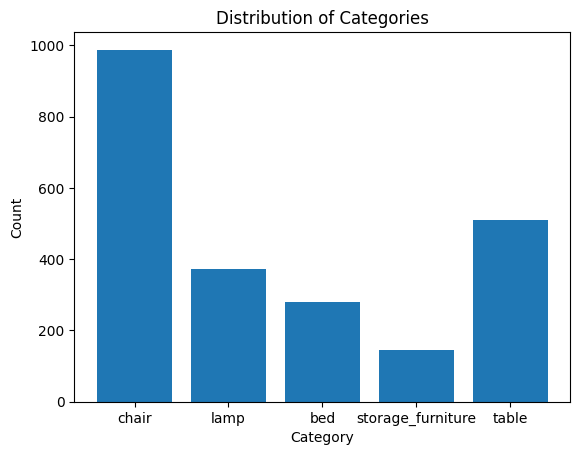

{'chair': 988, 'lamp': 373, 'bed': 279, 'storage_furniture': 145, 'table': 509}

In [76]:
visualization.class_distribution(raw_mashes_data_train,
                            lambda data: data[1])